In [ ]:
#LogisticRegression

In [ ]:
#Classification Model Process
1. X, y
2. train test split
3.model fit
4.prediction
5.Evalution
6.Evalution ko lagi confusion matrix use garinxa
    TP,TN,FP,FN
7.Accuracy auxa : correct prediction/total prediction
                 TP+TN/TP+TN+FP+FN


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X = data[['Age']]
y= data.Outcome

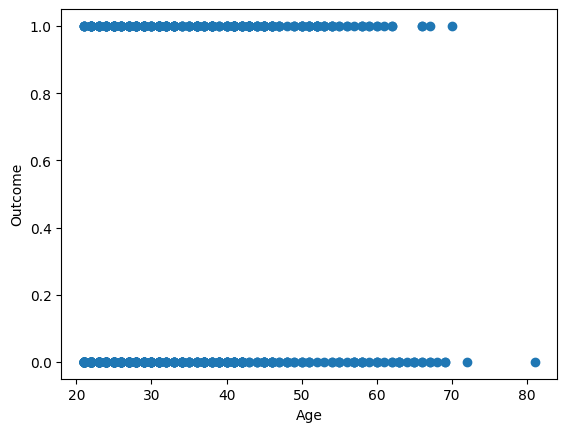

In [6]:
plt.scatter(data.Age,data.Outcome)
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

In [7]:
xtrain,xtest, ytrain,ytest = train_test_split(X,y ,test_size = 0.2, random_state = 25)

In [8]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [9]:
pred_new = pd.DataFrame({
    'Age':[50]
})

In [10]:
print(log_model.predict(pred_new))

[1]


In [11]:
xtest.shape

(154, 1)

In [12]:
yprediction = log_model.predict(xtest)

In [13]:
ytest

380    0
39     1
346    0
416    0
648    1
      ..
396    0
153    0
531    0
448    1
190    0
Name: Outcome, Length: 154, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [14]:
print(log_model.predict_proba(pred_new))

[[0.49807728 0.50192272]]


In [16]:
accuracy = accuracy_score(ytest, yprediction) # test data ko accuarcy patta lagako
print(accuracy)

0.6948051948051948


In [17]:
print(f'Accuracy:{accuracy:.2%}')

Accuracy:69.48%


# Confusion Matrix

In [18]:
cm = confusion_matrix(ytest, yprediction)
cm

array([[97,  8],
       [39, 10]])

In [40]:
#Precision nikalne
precision = precision_score(ytest, yprediction)
print(f'Precision:{precision:.2%}')

Precision:55.56%


In [ ]:
#Interpretation of Preccison: Out of total positive prediction , only 55% are actaul positive
TP/(TP+FP)

In [42]:
#Recall
recall = recall_score(ytest, yprediction)
print(f'Recall:{recall:.2%}')

Recall:20.41%


In [ ]:
#Interpretation : hamro model le pos 20% ota lai matrai capture garna sakiraxa ie Out of actaul positive, model can olny capture 20%
TP/(TP+FN)

In [ ]:
#F1-score

In [44]:
f1_score = f1_score(ytest, yprediction)
print(f'F1-Score:{f1_score:.2%}')

F1-Score:29.85%


In [ ]:
#Interpretation of F1-score

In [ ]:
#seaborn use garera visualization lai better banauuna sakxam

In [19]:
import seaborn as sns

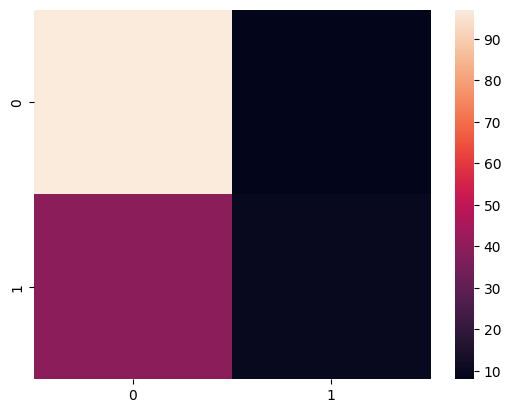

In [20]:
sns.heatmap(cm)# cm matra garda value ni ayena
plt.show()

In [21]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs
)
    Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.

    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    v

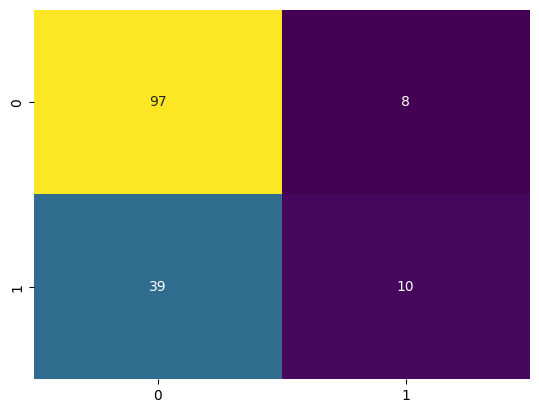

In [25]:
#cbar baneko color bar ho ra hatako teslai
#annot baneko numbering deko
#cmap baneko color ko collection hunxa
# cm matra garda value ni ayena
#actual lai rows ma rakhdinxa sklearn le 
#skicitlearn le 1 lai pos banxa 0 lai neg garxa 1 bhaneko pos ho ra 0 bhaneko neg ho yo case ma

sns.heatmap(cm, annot = True, cbar= False, cmap = 'viridis')
plt.show()

In [27]:
accurac = (97+10)/(97+8+39+10)
print(accurac)# same accuarcy ayo ie right xa accuaracy mathi deko

0.6948051948051948


In [ ]:
1.Accuarcy
2.Precision
3.F1 score

In [ ]:
Class Imbalance:
100 rows ra 90ota class ko label 0 xa ra 10 ota ko 1 xa label xa bhane it is call class Imbalance
90 label: 0 
10 label: 1

0 lai chai majale predict garxa
tara 1 lai ni as a 0 nai treat garxa

In [28]:
#class imbalance check garna lai count garne
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
data.shape

(769, 9)

In [31]:
target_count = data['Outcome'].value_counts()
target_count

Outcome
0    500
1    269
Name: count, dtype: int64

In [ ]:
# 0 ko case derai raixa ra 1 ko thorai raixa ie class imbalance occur bhayo

In [32]:
xtrain.shape 

(615, 1)

In [33]:
xtrain# yesko corresponding data y train ma xa

,Age
587,29
114,39
593,25
607,25
331,25
...,...
317,29
143,42
474,24
318,28


In [34]:
ytrain

587    0
114    1
593    0
607    0
331    0
      ..
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 615, dtype: int64

In [35]:
#ytrain ko value count garera heram ie training data ko
train_count = ytrain.value_counts()
train_count

Outcome
0    395
1    220
Name: count, dtype: int64

In [ ]:
# 5o percent vanda badi 0 ma xa ie 0 wala lai majale classify hunxa ra 1 wala le alik badi struggle garxa

In [ ]:
#yesto case ma accuarcy matra  suffiecient hudaina  model evalution ko lagi
90 - negative(0)
10 - posistive(1)

In [ ]:
TP = 5    FP = 5
FN = 5    TN = 85  


In [ ]:
accuracy = 90/100 = 90% ayo class imbalance ko case ho yo

# Precision

In [ ]:
1.Precision : TP/(TP+FP) : out of positive prediction how much is actual positive
Precision = 5/5+5: 50% # hamro model le jati positive xa tes bata 50% matra actal positive raixa 

# Recall

In [ ]:
Recall = TP/(TP+FN): how much positive cases  model can acess or capture ie model le kati pos lai capture garna sakxa
Recall = 5/(10) : 50% ie hamro model le 50 % positive case lai matra capture ie predict garna sakiraxa
pos ta capture garnai sakexaina ie diabestes pani raixa tara model le xaina vandiyo so yo danger ho so yesto case ma accuarcy ,matra herna vayena precision, recall haru pani herna paryo 

In [ ]:
#precision ra recall derai ako nai ramro ie vaneko jati prediction gareko teti nai actual huna payo ra pos bata sabai capture garna sakyo

# F1 Score

In [ ]:
F1 score precision ra recall high ako bela auxa ie harmonic mean of precision and recall

In [ ]:
F1-score = 2 * Precision * Recall/(Precision + Recall)